# <b> Sentiment Classification using ANN (From Scratch)

## <i>Problem Statement</i>
We are building an Artificial Neural Network (ANN) from scratch using NumPy to classify movie reviews as positive or negative.

In [1]:
# !pip install numpy pandas matplotlib seaborn scikit-learn kaggle --quiet 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Set seed for reproducibility
np.random.seed(42)


---
## Dataset Preparation (Synthetic Movie Reviews)

In [4]:
df = pd.read_csv("../static/IMDB Dataset.csv")
print(df.shape)

(50000, 2)


In [5]:

df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [6]:
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [7]:
# Set style for visualizations
sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')
# Display basic info
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive



Missing values in each column:
review       0
sentiment    0
dtype: int64

Sentiment distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


C:\Users\ankit\AppData\Local\Temp\ipykernel_28436\3635815746.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


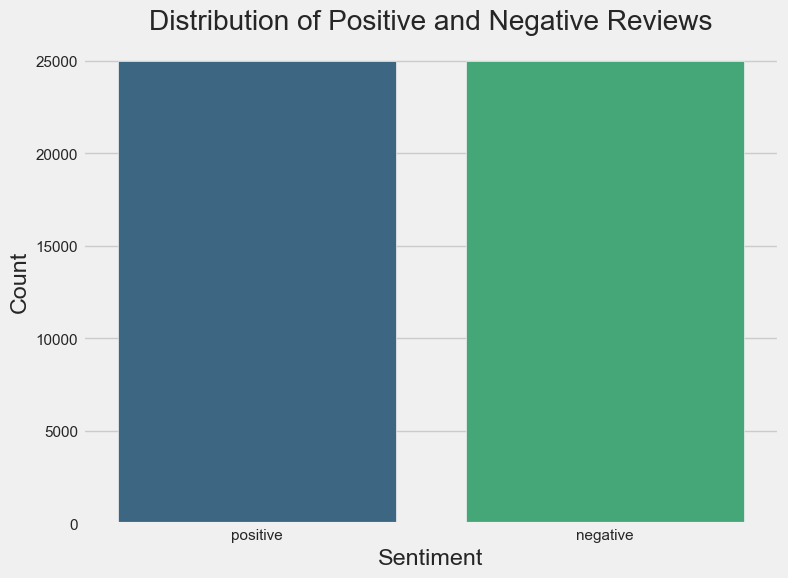

In [8]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check the distribution of sentiments
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

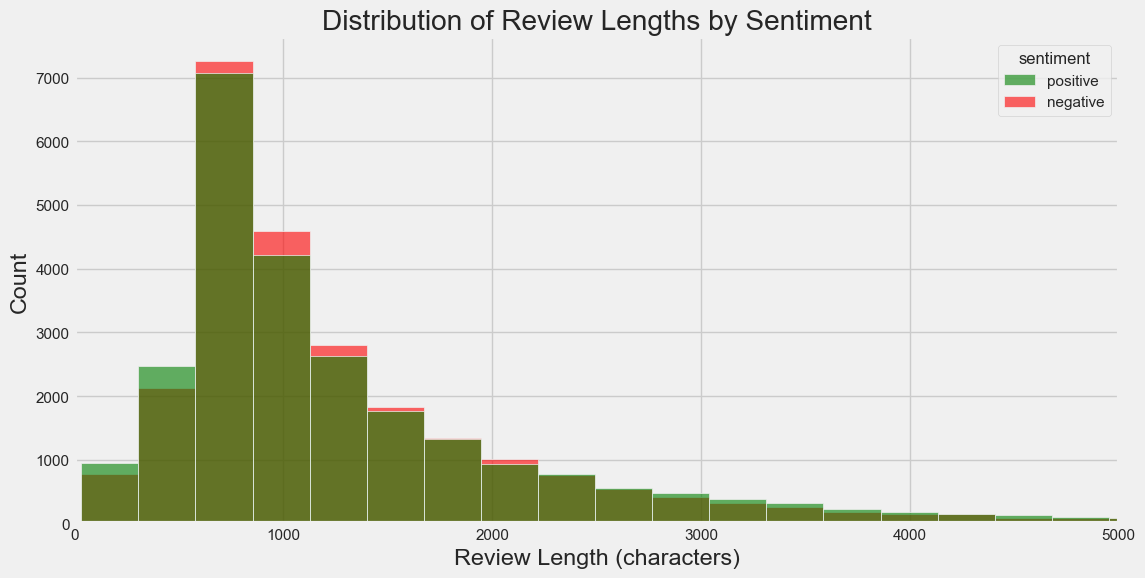

C:\Users\ankit\AppData\Local\Temp\ipykernel_28436\594365556.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='review_length',


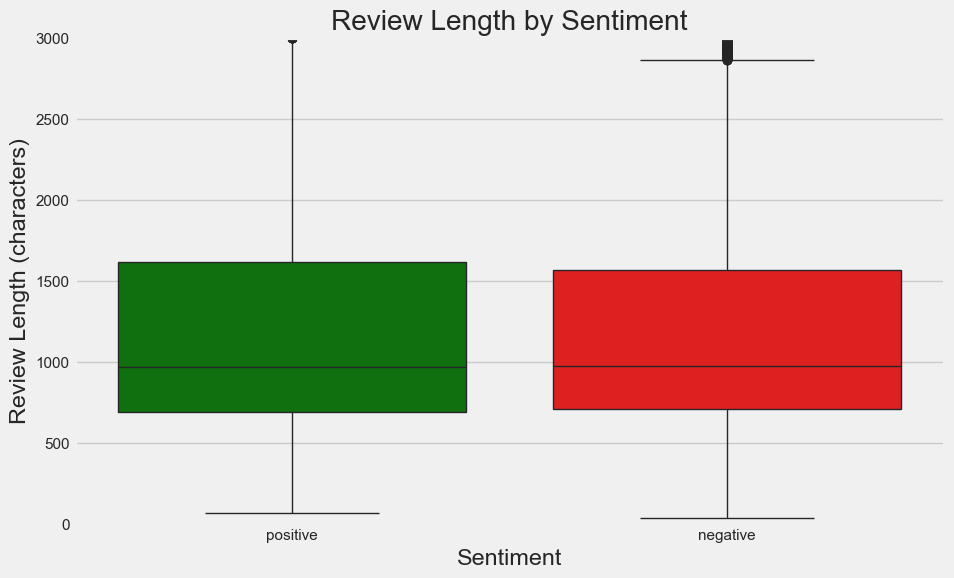

In [9]:
# Add a column for review length
df['review_length'] = df['review'].apply(len)

# Plot distribution of review lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, 
             palette={'positive':'green', 'negative':'red'}, alpha=0.6)
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.xlim(0, 5000)  # Limit x-axis to make plot more readable
plt.show()

# Box plot of review lengths by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='review_length', 
            palette={'positive':'green', 'negative':'red'})
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length (characters)')
plt.ylim(0, 3000)  # Limit y-axis to make plot more readable
plt.show()

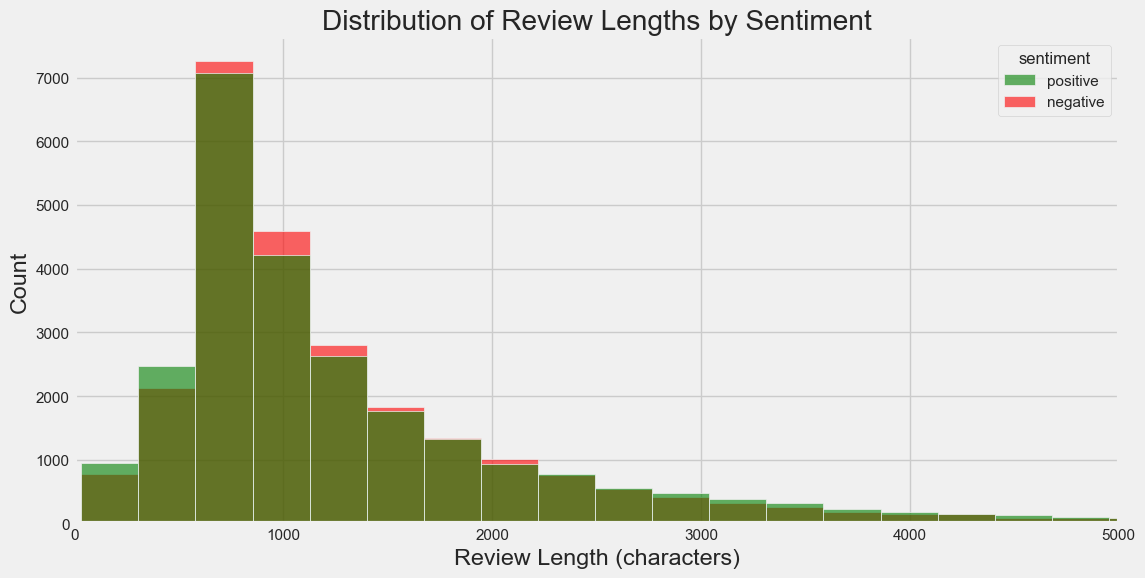

C:\Users\ankit\AppData\Local\Temp\ipykernel_28436\594365556.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='review_length',


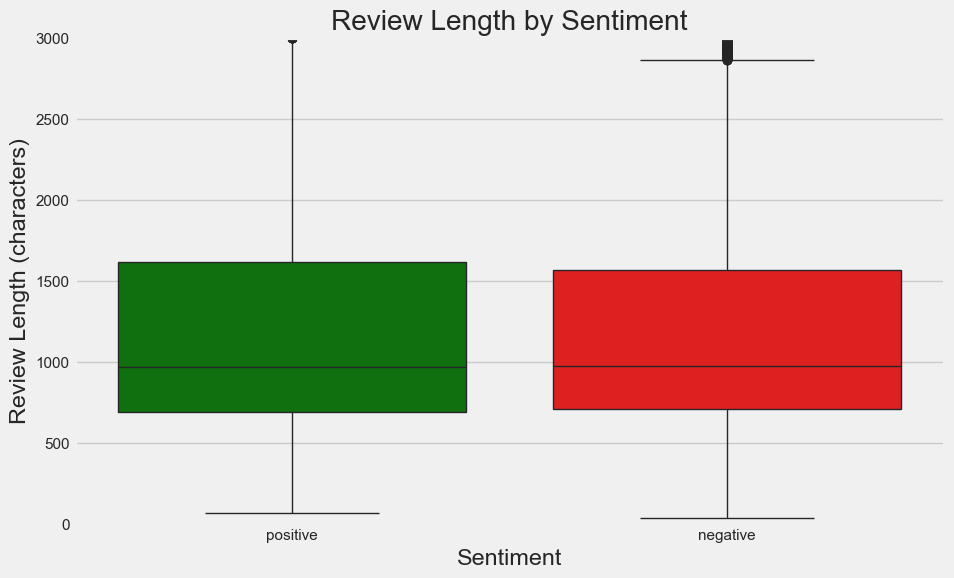

In [10]:
# Add a column for review length
df['review_length'] = df['review'].apply(len)

# Plot distribution of review lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, 
             palette={'positive':'green', 'negative':'red'}, alpha=0.6)
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.xlim(0, 5000)  # Limit x-axis to make plot more readable
plt.show()

# Box plot of review lengths by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='review_length', 
            palette={'positive':'green', 'negative':'red'})
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length (characters)')
plt.ylim(0, 3000)  # Limit y-axis to make plot more readable
plt.show()

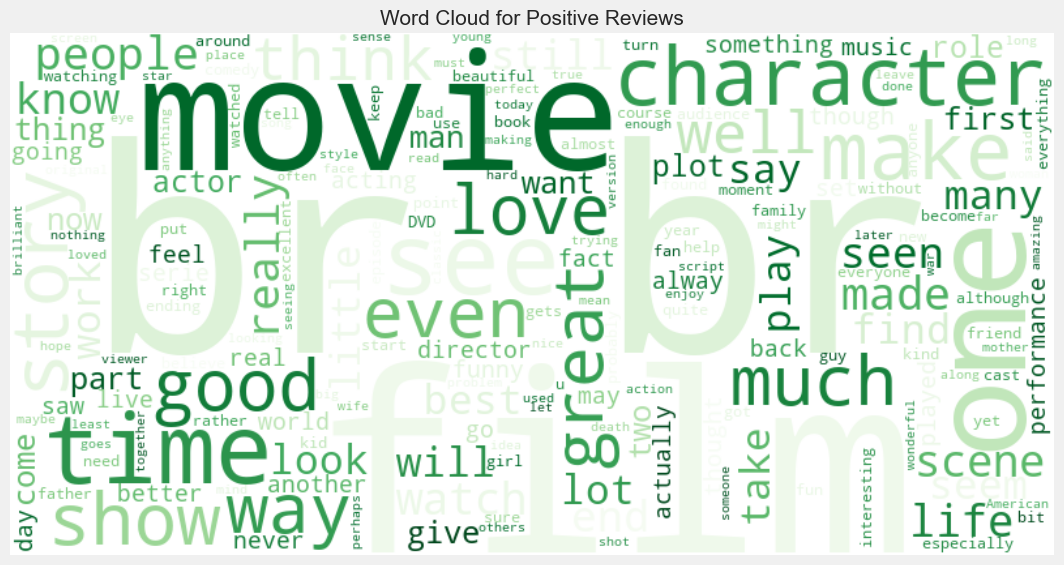

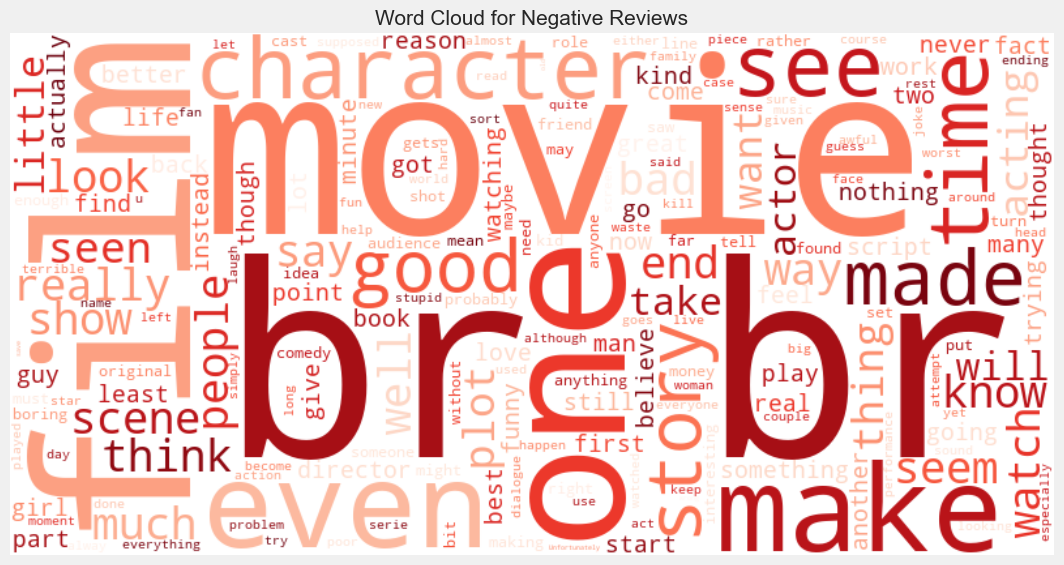

In [11]:
# Combine all positive reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'])

# Combine all negative reviews
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'])

# Create word cloud for positive reviews
plt.figure(figsize=(12, 8))
wordcloud_positive = WordCloud(width=800, height=400, 
                              background_color='white', 
                              colormap='Greens').generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews', fontsize=15)
plt.axis('off')
plt.show()

# Create word cloud for negative reviews
plt.figure(figsize=(12, 8))
wordcloud_negative = WordCloud(width=800, height=400, 
                              background_color='white', 
                              colormap='Reds').generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews', fontsize=15)
plt.axis('off')
plt.show()

C:\Users\ankit\AppData\Local\Temp\ipykernel_28436\1227229818.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in top_positive_words],


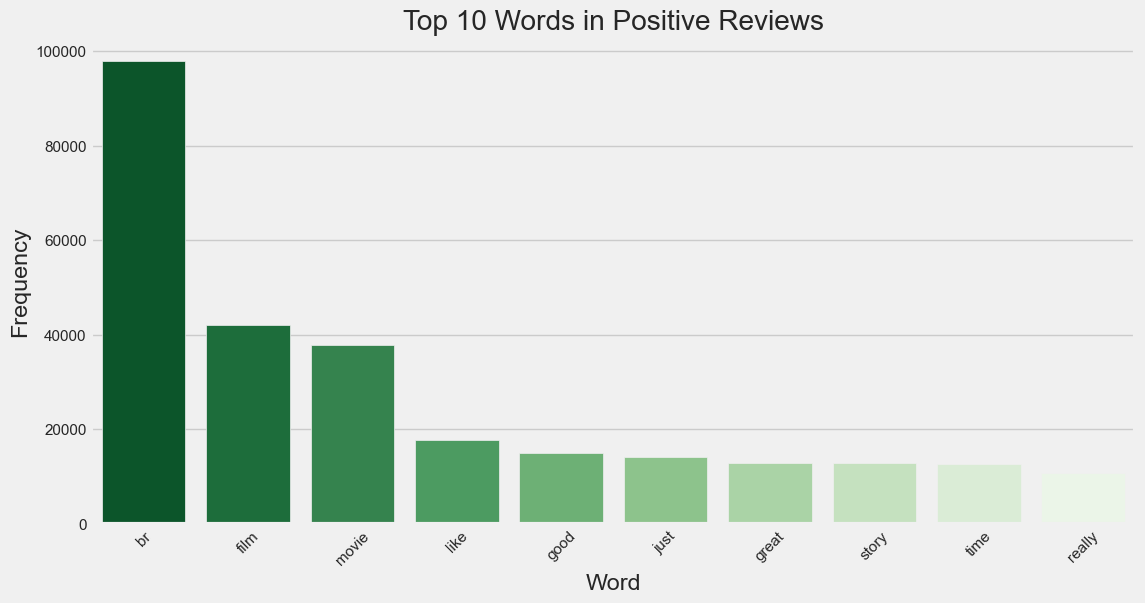

C:\Users\ankit\AppData\Local\Temp\ipykernel_28436\1227229818.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in top_negative_words],


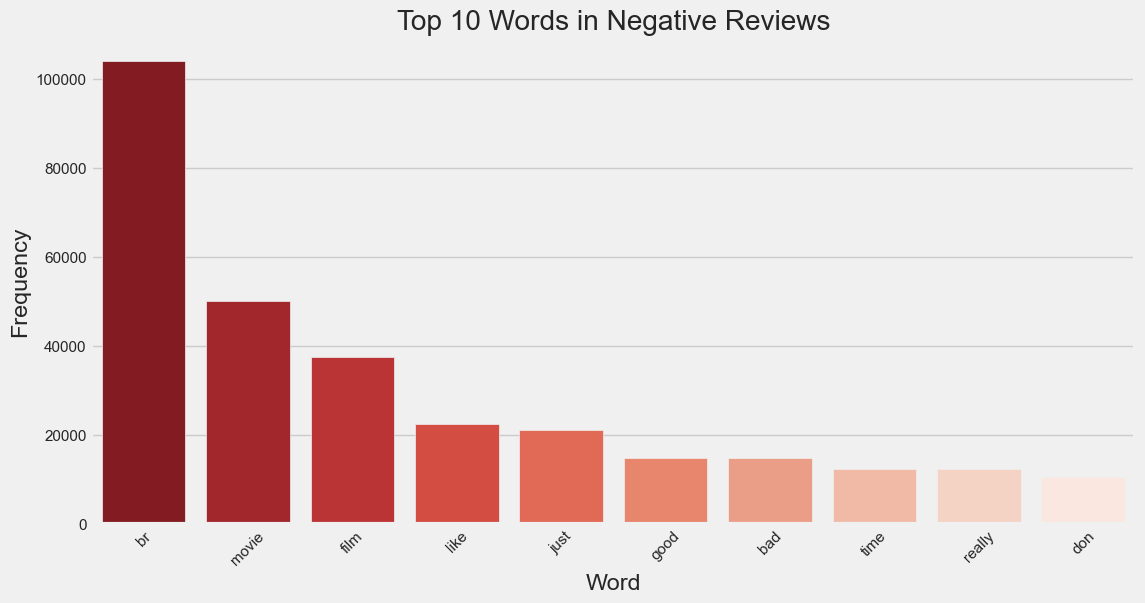

In [12]:
# Function to get top n words from each sentiment
def get_top_words(text_series, n=10):
    vec = CountVectorizer(stop_words='english').fit(text_series)
    bag_of_words = vec.transform(text_series)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top words for each sentiment
top_positive_words = get_top_words(df[df['sentiment'] == 'positive']['review'])
top_negative_words = get_top_words(df[df['sentiment'] == 'negative']['review'])

# Plot top positive words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in top_positive_words], 
            y=[word[1] for word in top_positive_words], 
            palette='Greens_r')
plt.title('Top 10 Words in Positive Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot top negative words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in top_negative_words], 
            y=[word[1] for word in top_negative_words], 
            palette='Reds_r')
plt.title('Top 10 Words in Negative Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

C:\Users\ankit\AppData\Local\Temp\ipykernel_28436\3272672050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in top_positive_bigrams],


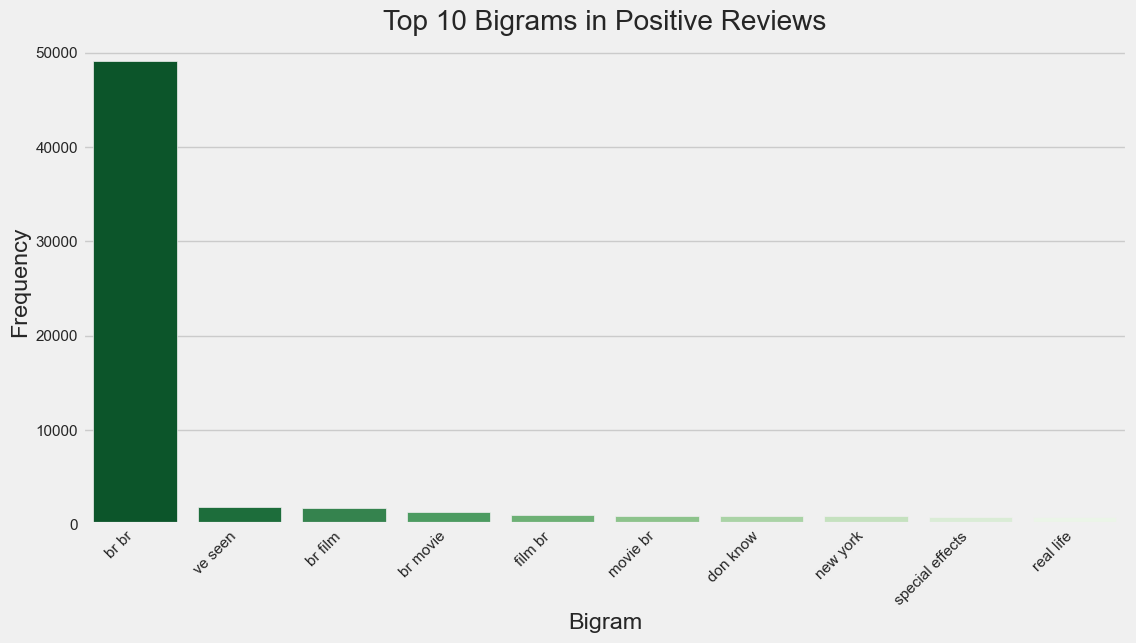

C:\Users\ankit\AppData\Local\Temp\ipykernel_28436\3272672050.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in top_negative_bigrams],


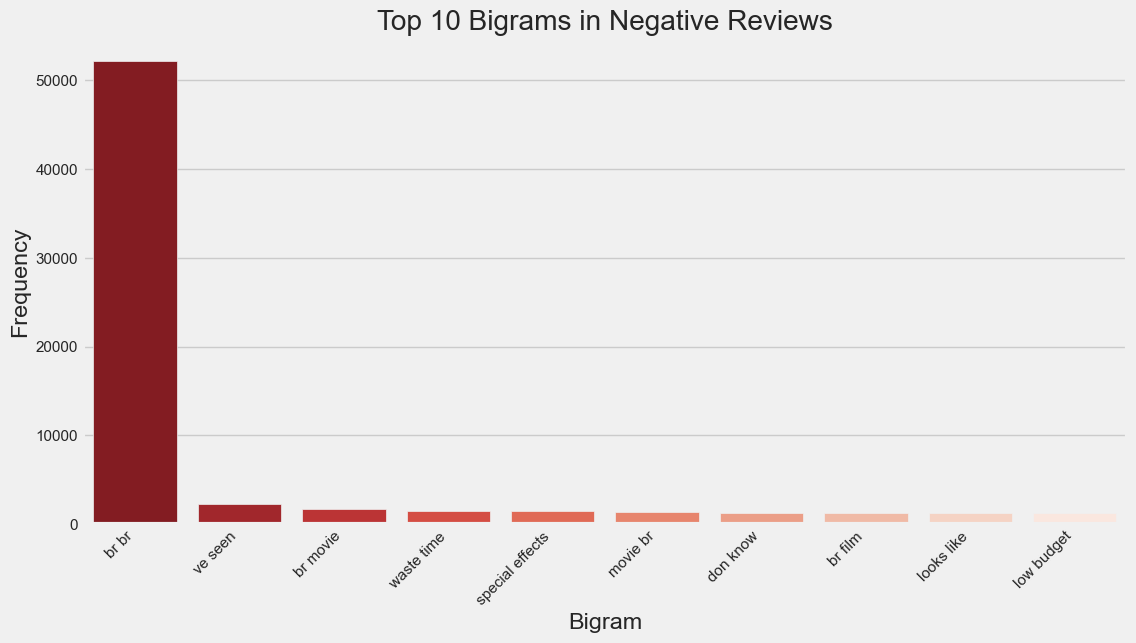

In [13]:
# Function to get top n-grams
def get_top_ngrams(text_series, n=10, ngram_range=(2,2)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(text_series)
    bag_of_words = vec.transform(text_series)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top bigrams for each sentiment
top_positive_bigrams = get_top_ngrams(df[df['sentiment'] == 'positive']['review'])
top_negative_bigrams = get_top_ngrams(df[df['sentiment'] == 'negative']['review'])

# Plot top positive bigrams
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in top_positive_bigrams], 
            y=[word[1] for word in top_positive_bigrams], 
            palette='Greens_r')
plt.title('Top 10 Bigrams in Positive Reviews')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot top negative bigrams
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in top_negative_bigrams], 
            y=[word[1] for word in top_negative_bigrams], 
            palette='Reds_r')
plt.title('Top 10 Bigrams in Negative Reviews')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Correlation between review length and sentiment: 0.016


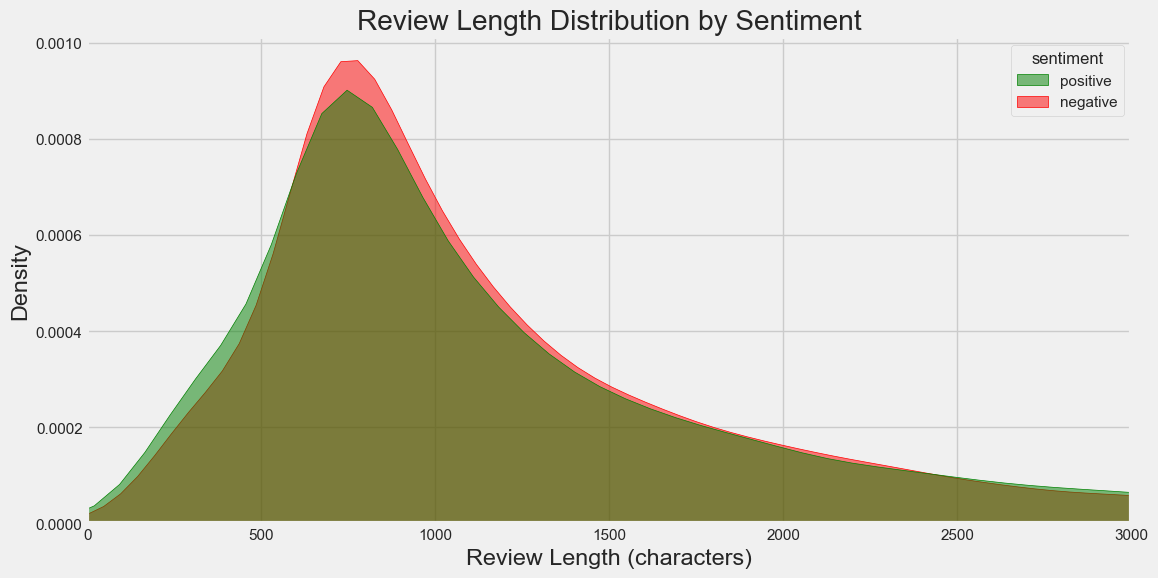

In [14]:
# Calculate correlation between review length and sentiment
df['sentiment_numeric'] = df['sentiment'].map({'positive': 1, 'negative': 0})
correlation = df['review_length'].corr(df['sentiment_numeric'])

print(f"Correlation between review length and sentiment: {correlation:.3f}")

# Visualize the relationship
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='review_length', hue='sentiment', 
            palette={'positive':'green', 'negative':'red'}, 
            fill=True, common_norm=False, alpha=0.5)
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Review Length (characters)')
plt.ylabel('Density')
plt.xlim(0, 3000)
plt.show()

C:\Users\ankit\AppData\Local\Temp\ipykernel_28436\3873181776.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='html_tags_count',


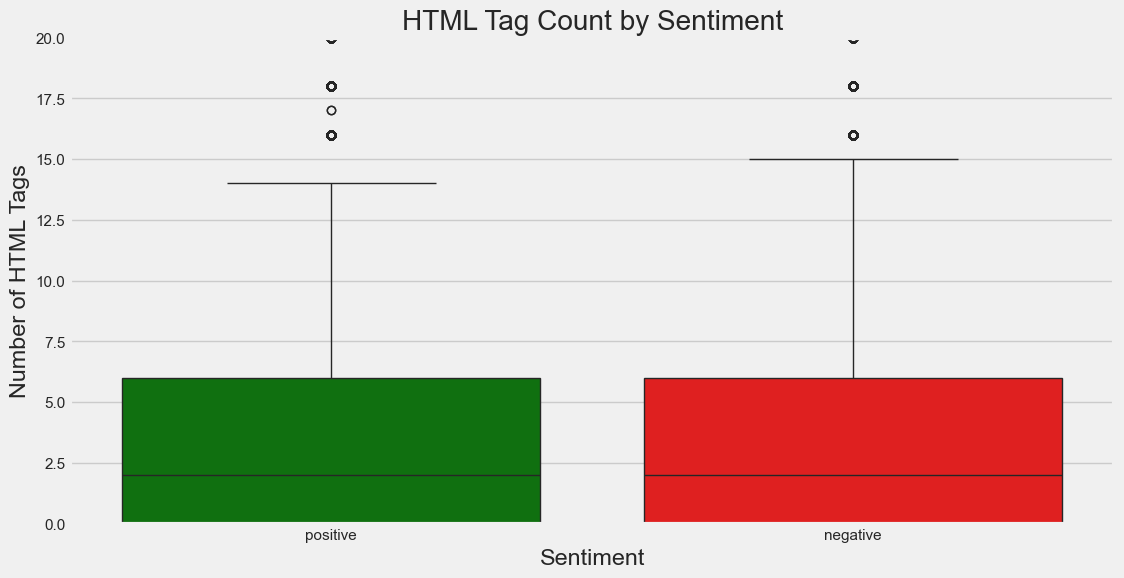

In [15]:
# Count HTML tags in reviews
df['html_tags_count'] = df['review'].str.count('<.*?>')

# Plot HTML tag count distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sentiment', y='html_tags_count', 
            palette={'positive':'green', 'negative':'red'})
plt.title('HTML Tag Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of HTML Tags')
plt.ylim(0, 20)  # Limit y-axis to make plot more readable
plt.show()

In [16]:
# Save all figures
for i in plt.get_fignums():
    plt.figure(i)
    plt.savefig(f'figure_{i}.png', bbox_inches='tight', dpi=300)

In [17]:
# Encoding Sentiment Labels
# df.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

In [18]:
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [19]:
# Preprocess the data
def preprocess_text(text):
    # Simple preprocessing - remove HTML tags and lowercase
    text = text.lower()
    text = text.replace('<br />', ' ')
    return text

df['review'] = df['review'].apply(preprocess_text)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split the data
X = df['review']
y = df['sentiment'].values

In [20]:

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorize the text data
vectorizer = CountVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

# Normalize the data
X_train_vec = X_train_vec / np.max(X_train_vec)
X_test_vec = X_test_vec / np.max(X_test_vec)


---
## ANN Implementation from Scratch

## Artificial Neural Network (ANN) Architecture for Sentiment Analysis


## Architecture Details

### Network Structure

The neural network follows a feed-forward architecture with the following components:

1. **Input Layer**: 
   - Dimensionality: Determined by the feature space (1000 features after vectorization)
   - The input consists of normalized word counts from text data

2. **Hidden Layers**:
   - First hidden layer: 128 neurons with Leaky ReLU activation
   - Second hidden layer: 64 neurons with Leaky ReLU activation

3. **Output Layer**:
   - Single neuron with Sigmoid activation function for binary classification

### Visualization

```
Input Layer [1000] → Hidden Layer 1 [128] → Hidden Layer 2 [64] → Output Layer [1]
     ↑               ↑                   ↑                  ↑
Text Features    Leaky ReLU         Leaky ReLU         Sigmoid
```

## Optimization Techniques

### Weight Initialization

- **He Initialization**: Weights are initialized using a normal distribution scaled by √(2/n_inputs)
- This approach helps prevent vanishing/exploding gradients, especially with ReLU-based activations

### Activation Functions

- **Leaky ReLU** (Hidden Layers):
  - Formula: f(x) = max(αx, x) where α = 0.01
  - Advantages: Prevents "dying ReLU" problem by allowing small negative values
  
- **Sigmoid** (Output Layer):
  - Formula: σ(x) = 1 / (1 + e^(-x))
  - Numerically stable implementation to prevent overflow
  - Appropriate for binary classification tasks

### Training Optimizations

1. **Mini-batch Gradient Descent**:
   - Batch size: 32 samples
   - Provides a balance between computational efficiency and training stability

2. **Learning Rate Scheduling**:
   - Initial learning rate: 0.1
   - Decay rate: 0.95 applied every 10 epochs
   - Helps convergence by reducing the step size as training progresses

3. **Gradient Clipping**:
   - Maximum gradient norm: 5.0
   - Prevents exploding gradients by scaling large gradients

4. **Loss Function**:
   - Binary Cross-Entropy Loss
   - Numerically stabilized to avoid log(0) issues

## Memory Optimization

The network implementation includes several memory optimization techniques:

1. Feature reduction to lower dimensionality
2. Batch processing for large datasets
3. Selective computation of evaluation metrics
4. Efficient memory management during forward and backward passes

## Model Performance

The model's performance can be assessed using:
- Training and validation loss curves
- Classification metrics (accuracy, precision, recall, F1-score)
- Confusion matrix analysis

## Implementation Notes

This neural network is implemented from scratch using NumPy, providing full transparency and control over the architecture and training process. The implementation allows for customization of:

- Number and size of hidden layers
- Learning rate and decay parameters
- Batch size and training epochs
- Activation functions and initialization methods

## Exporting the Model

The model is saved to "../models" directory using NumPy's save functionality, preserving the weights, biases, and architecture information for future use or deployment.

Epoch 0: Loss = 0.6904, Accuracy = 0.5300, LR = 0.100000
Epoch 5: Loss = 0.6089, Accuracy = 0.7090, LR = 0.100000
Epoch 10: Loss = 0.5636, Accuracy = 0.7620, LR = 0.095000
Epoch 15: Loss = 0.6699, Accuracy = 0.5920, LR = 0.095000
Epoch 20: Loss = 0.5196, Accuracy = 0.7330, LR = 0.090250
Epoch 25: Loss = 0.5218, Accuracy = 0.7250, LR = 0.090250
Epoch 29: Loss = 0.4503, Accuracy = 0.8240, LR = 0.090250


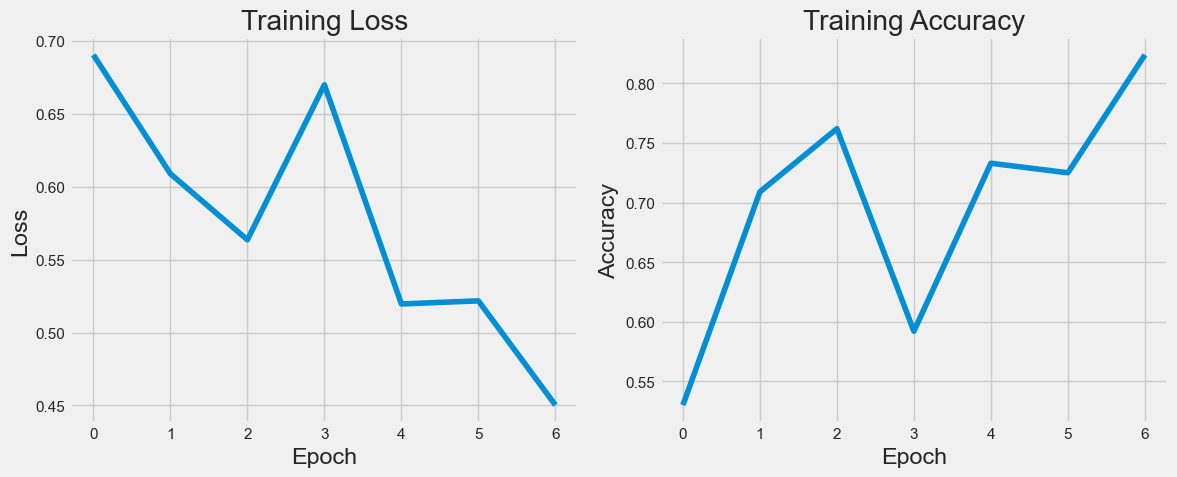

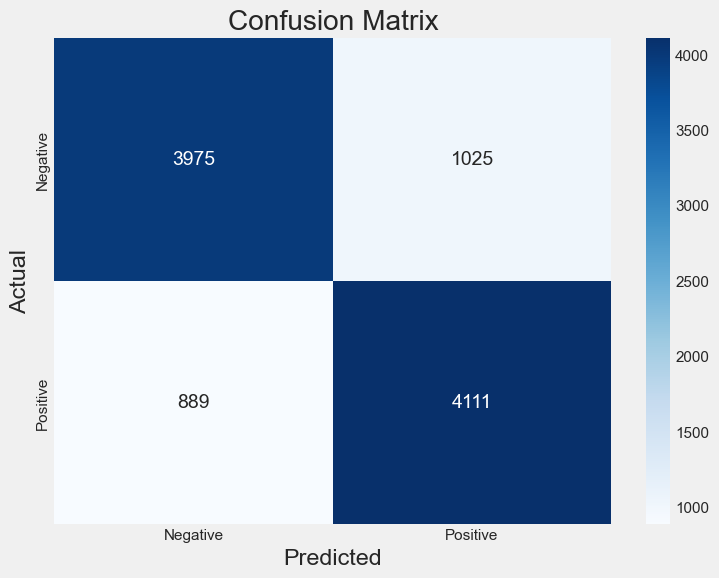


Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.80      0.81      5000
    Positive       0.80      0.82      0.81      5000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000


Test Accuracy: 80.86%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

class ImprovedNeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        # Initialize weights and biases with He initialization
        self.weights = []
        self.biases = []
        
        # Input to first hidden layer
        self.weights.append(np.random.randn(input_size, hidden_sizes[0]) * np.sqrt(2./input_size))
        self.biases.append(np.zeros((1, hidden_sizes[0])))
        
        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            self.weights.append(np.random.randn(hidden_sizes[i-1], hidden_sizes[i]) * np.sqrt(2./hidden_sizes[i-1]))
            self.biases.append(np.zeros((1, hidden_sizes[i])))
        
        # Last hidden to output
        self.weights.append(np.random.randn(hidden_sizes[-1], output_size) * np.sqrt(2./hidden_sizes[-1]))
        self.biases.append(np.zeros((1, output_size)))
    
    def leaky_relu(self, z, alpha=0.01):
        return np.maximum(alpha*z, z)
    
    def leaky_relu_derivative(self, z, alpha=0.01):
        dz = np.ones_like(z)
        dz[z < 0] = alpha
        return dz
    
    def sigmoid(self, z):
        # Numerically stable sigmoid
        return np.where(z >= 0, 
                       1 / (1 + np.exp(-z)), 
                       np.exp(z) / (1 + np.exp(z)))
    
    def forward_propagation(self, X):
        self.activations = [X]
        self.z_values = []
        
        # Forward pass through each layer
        for i in range(len(self.weights)):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(z)
            if i == len(self.weights) - 1:
                # Output layer
                a = self.sigmoid(z)
            else:
                # Hidden layers with Leaky ReLU
                a = self.leaky_relu(z)
            self.activations.append(a)
        
        return self.activations[-1]
    
    def backward_propagation(self, X, y, learning_rate):
        m = X.shape[0]
        y = y.reshape(-1, 1)
        
        # Output layer error
        dZ = self.activations[-1] - y
        dW = np.dot(self.activations[-2].T, dZ) / m
        db = np.sum(dZ, axis=0, keepdims=True) / m
        
        # Store gradients
        gradients = [(dW, db)]
        
        # Backpropagate through hidden layers
        for i in range(len(self.weights)-2, -1, -1):
            dA = np.dot(dZ, self.weights[i+1].T)
            dZ = dA * self.leaky_relu_derivative(self.z_values[i])
            dW = np.dot(self.activations[i].T, dZ) / m
            db = np.sum(dZ, axis=0, keepdims=True) / m
            gradients.insert(0, (dW, db))
        
        # Update weights and biases with gradient clipping
        max_norm = 5.0  # Gradient clipping threshold
        for i in range(len(self.weights)):
            grad_norm = np.linalg.norm(gradients[i][0])
            if grad_norm > max_norm:
                gradients[i] = (gradients[i][0] * max_norm / grad_norm, gradients[i][1])
            
            self.weights[i] -= learning_rate * gradients[i][0]
            self.biases[i] -= learning_rate * gradients[i][1]
    
    def compute_loss(self, y, y_hat):
        # Numerically stable cross-entropy
        # Make sure y and y_hat are the right shapes
        y = y.reshape(-1, 1) if len(y.shape) == 1 else y
        
        # Clip predictions to avoid log(0)
        y_hat = np.clip(y_hat, 1e-15, 1-1e-15)
        
        # Compute binary cross-entropy
        return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    
    def train(self, X, y, epochs, learning_rate, batch_size=32, verbose=True):
        losses = []
        accuracies = []
        
        # Convert y to the right shape
        y = np.array(y)
        
        # Use smaller batch_size to reduce memory usage
        batch_size = min(batch_size, 32)
        
        # Learning rate decay
        initial_lr = learning_rate
        decay_rate = 0.95
        decay_steps = 10
        
        # Calculate validation metrics only every few epochs to save memory
        eval_frequency = 5
        
        for epoch in range(epochs):
            # Learning rate decay
            if epoch % decay_steps == 0 and epoch > 0:
                learning_rate = initial_lr * (decay_rate ** (epoch // decay_steps))
            
            # Mini-batch SGD with shuffling
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            
            # Process in smaller batches
            for i in range(0, X.shape[0], batch_size):
                batch_indices = indices[i:i+batch_size]
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]
                
                # Forward and backward pass
                y_hat = self.forward_propagation(X_batch)
                self.backward_propagation(X_batch, y_batch, learning_rate)
            
            # Compute metrics on a sample of training data to save memory
            if epoch % eval_frequency == 0 or epoch == epochs-1:
                # Use a subset for evaluation
                eval_size = min(1000, X.shape[0])
                eval_indices = np.random.choice(X.shape[0], eval_size, replace=False)
                X_eval = X[eval_indices]
                y_eval = y[eval_indices]
                
                y_hat = self.forward_propagation(X_eval)
                loss = self.compute_loss(y_eval, y_hat)
                y_pred = (y_hat > 0.5).astype(int)
                acc = accuracy_score(y_eval, y_pred)
                
                losses.append(loss)
                accuracies.append(acc)
                
                if verbose:
                    print(f"Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {acc:.4f}, LR = {learning_rate:.6f}")
        
        return losses, accuracies
    
    def predict(self, X, threshold=0.5, batch_size=1000):
        # Make predictions in batches to save memory
        num_samples = X.shape[0]
        y_pred = np.zeros((num_samples, 1))
        
        for i in range(0, num_samples, batch_size):
            end_idx = min(i + batch_size, num_samples)
            X_batch = X[i:end_idx]
            y_hat_batch = self.forward_propagation(X_batch)
            y_pred[i:end_idx] = (y_hat_batch > threshold).astype(int)
            
        return y_pred

# Feature reduction function to lower memory usage
def reduce_features(X, max_features=1000):
    # If X is already a numpy array with fewer features than max_features, return it
    if isinstance(X, np.ndarray) and X.shape[1] <= max_features:
        return X
    
    if X.shape[1] > max_features:
        variances = np.var(X, axis=0)
        top_indices = np.argsort(-variances)[:max_features]  # Negative to sort in descending order
        return X[:, top_indices]
    
    return X

# Main execution code
def main():

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Vectorize with fewer features
    vectorizer = CountVectorizer(max_features=1000)  # Reduced from 5000
    X_train_vec = vectorizer.fit_transform(X_train).toarray()
    X_test_vec = vectorizer.transform(X_test).toarray()
    
    # Further reduce features if necessary
    X_train_reduced = reduce_features(X_train_vec)
    X_test_reduced = reduce_features(X_test_vec)
    
    # Normalize the data
    max_val = np.max(X_train_reduced) if np.max(X_train_reduced) > 0 else 1
    X_train_norm = X_train_reduced / max_val
    X_test_norm = X_test_reduced / max_val
    
    # Free up memory
    del X_train_vec, X_test_vec, X_train_reduced, X_test_reduced
    
    # Initialize the neural network with smaller layers
    input_size = X_train_norm.shape[1]
    nn = ImprovedNeuralNetwork(input_size, [128, 64], 1)  # Smaller architecture
    
    # Train the model with fewer epochs and smaller batch size
    epochs = 30  # Reduced from 50
    learning_rate = 0.1
    losses, accuracies = nn.train(X_train_norm, y_train, epochs, learning_rate, batch_size=32)
    
    # Plot training progress
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracies)
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.show()
    
    # Make predictions in batches
    y_pred = nn.predict(X_test_norm, batch_size=100)
    
    # Ensure y_test and y_pred have compatible shapes
    y_test_arr = np.array(y_test).reshape(-1, 1) if len(np.array(y_test).shape) == 1 else np.array(y_test)
    y_pred_flat = y_pred.flatten() if y_pred.shape[1] == 1 else y_pred
    
    # Confusion matrix
    cm = confusion_matrix(y_test_arr, y_pred_flat)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test_arr, y_pred_flat, target_names=['Negative', 'Positive']))
    
    # Accuracy
    accuracy = accuracy_score(y_test_arr, y_pred_flat)
    print(f"\nTest Accuracy: {accuracy*100:.2f}%")
    
    return nn, vectorizer

# This allows the script to be imported without running
if __name__ == "__main__":
    model, vectorizer = main()

---
## Results Visualization


Review: ok let's start with saying that when a dutch movie is bad, it's really bad. rarely something with a little bit of quality comes along(lek, karakter) here in holland but not often. costa! is about 4 gi...
Actual Sentiment: Negative
Predicted Sentiment: Positive
---

Review: at the beginning of the film we watch may and toots preparing for their trip to london for a visit to their grown children. one can see toots is not in the best of health, but he goes along. when he d...
Actual Sentiment: Positive
Predicted Sentiment: Positive
---

Review: olivia d'abo in a wet t-shirt is the only thing this movie has going for it. other than that, this canadian production about a man taking out a vicious band of hillbillies is not worth anybody's time....
Actual Sentiment: Negative
Predicted Sentiment: Positive
---

Review: i thoroughly enjoyed this movie...and i watch it from time to time still. i've used it in my music classes at the school where i teach. the kids seem to enjoy it, althou

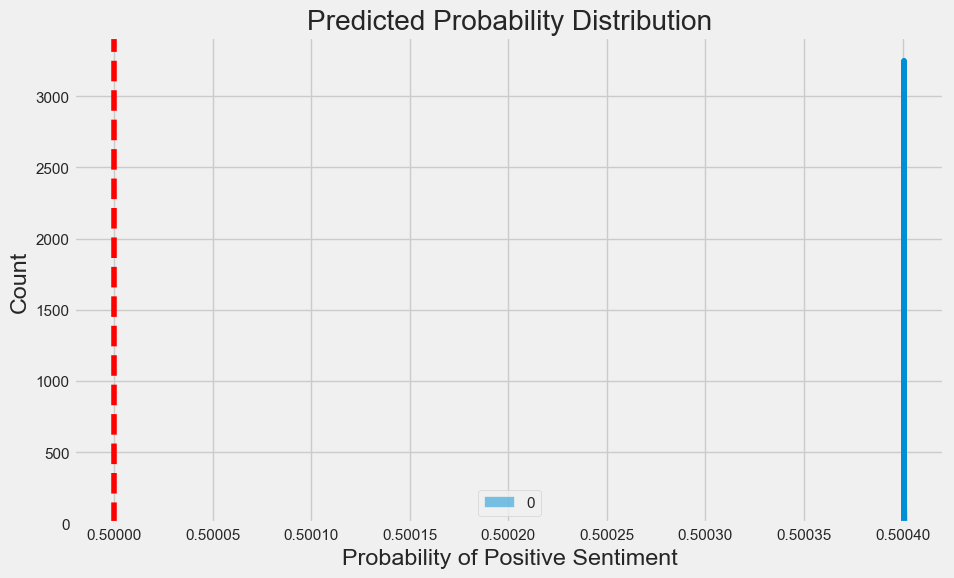

In [42]:
# Sample predictions
sample_indices = np.random.choice(len(X_test), 5, replace=False)
for idx in sample_indices:
    print(f"\nReview: {X_test.iloc[idx][:200]}...")
    print(f"Actual Sentiment: {'Positive' if y_test[idx] == 1 else 'Negative'}")
    print(f"Predicted Sentiment: {'Positive' if y_pred[idx] == 1 else 'Negative'}")
    print("---")

# Probability distribution
y_probs = nn.forward_propagation(X_test_vec)
plt.figure(figsize=(10, 6))
sns.histplot(y_probs, bins=20, kde=True)
plt.title('Predicted Probability Distribution')
plt.xlabel('Probability of Positive Sentiment')
plt.ylabel('Count')
plt.axvline(0.5, color='red', linestyle='--')
plt.show()

In [44]:
import numpy as np
import os
import json
import pickle

def export_model(nn, vectorizer, export_path="../models"):
    """
    Export the neural network model and vectorizer to the specified path.
    
    Args:
        nn: Trained neural network model
        vectorizer: Fitted CountVectorizer
        export_path: Directory to save the model
    """
    # Create directory if it doesn't exist
    os.makedirs(export_path, exist_ok=True)
    
    # Save weights and biases
    model_params = {
        "weights": [w.tolist() for w in nn.weights],
        "biases": [b.tolist() for b in nn.biases],
    }
    
    # Save model architecture information
    architecture = {
        "input_size": nn.weights[0].shape[0],
        "hidden_sizes": [w.shape[1] for w in nn.weights[:-1]],
        "output_size": nn.weights[-1].shape[1],
        "activation_hidden": "leaky_relu",
        "activation_output": "sigmoid"
    }
    
    # Save model parameters and architecture
    with open(os.path.join(export_path, "model_params.json"), "w") as f:
        json.dump(model_params, f)
    
    with open(os.path.join(export_path, "model_architecture.json"), "w") as f:
        json.dump(architecture, f)
    
    # Save vectorizer
    with open(os.path.join(export_path, "vectorizer.pkl"), "wb") as f:
        pickle.dump(vectorizer, f)
    
    # Create a model info file
    model_info = {
        "name": "Text Classification Neural Network",
        "version": "1.0",
        "created_date": np.datetime_as_string(np.datetime64('now')),
        "description": "Feed-forward neural network with 2 hidden layers for text classification",
        "feature_count": nn.weights[0].shape[0],
        "hidden_layers": [w.shape[1] for w in nn.weights[:-1]],
    }
    
    with open(os.path.join(export_path, "model_info.json"), "w") as f:
        json.dump(model_info, f)
    
    print(f"Model successfully exported to {export_path}")
    print(f"Files saved:")
    print(f"  - model_params.json (weights and biases)")
    print(f"  - model_architecture.json (network structure)")
    print(f"  - vectorizer.pkl (text vectorizer)")
    print(f"  - model_info.json (metadata)")


    # Export the model
export_model(nn, vectorizer)



Model successfully exported to ../models
Files saved:
  - model_params.json (weights and biases)
  - model_architecture.json (network structure)
  - vectorizer.pkl (text vectorizer)
  - model_info.json (metadata)
